<div style="width: 100%; text-align: center;">
    <div style="background-color:#007F00; padding: 0.5rem;">
        <h1 style="font-weight: bold; font-size: 2.5em; color: black;"> AGRHYMET CENTRE CLIMATIQUE REGIONAL POUR L'AFRIQUE DE L'OUEST ET LE SAHEL</h1>
   </div>

   <div style="text-align: center;">
  <img src="https://www.sareco.org/wp-content/uploads/2017/07/plrDvYX1.jpg" width="200">
</div>

<a id="1"></a>
# <p style="padding:10px;background-color:#FFFFFF ;margin:0;color:#007F00;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Capacity Building in Seasonal Hydrological Forecasting </p>



<a id="1"></a>
### <p style="padding:10px;background-color:#000000 ;margin:0;color:#007F00;font-family:#newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Download Data for WASS2SHydroR </p>

In [1]:
import pycpt
import packaging
min_version = '2.5.0'
assert packaging.version.parse(pycpt.__version__) >= packaging.version.parse(min_version), f'This notebook requires version {min_version} or higher of the pycpt library, but you have version {pycpt.__version__}. Please close the notebook, update your environment, and load the notebook again. See https://iri-pycpt.github.io/installation/'

import cptdl as dl 
from cptextras import get_colors_bars
import cptextras as ce
import datetime as dt
import numpy as np
from pathlib import Path
import xarray as xr
import pandas as pd
import datetime

import os
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import numpy as np

#### Define Case Directory

In [2]:
os.chdir("D:/CCR_AOS/WASS2SHydroR-training/data")

In [3]:
case_directory =  Path.home() / "D:/CCR_AOS/WASS2SHydroR-training/data" / "pycpt_HydroApr2025_SST_Nino_v3"
case_directory.mkdir(exist_ok=True, parents=True)

#### Display the list of available predictors

In [4]:
print([i for i in list(dl.hindcasts.keys()) if "PRCP" in i ])

['CanCM4i.PRCP', 'CanSIPSv2.PRCP', 'CanSIPSIC3.PRCP', 'CanSIPSIC4.PRCP', 'GEM5NEMO.PRCP', 'CCSM4.PRCP', 'CESM1.PRCP', 'CanCM3.PRCP', 'CanCM4.PRCP', 'FLORB01.PRCP', 'FLORA06.PRCP', 'SPEAR.PRCP', 'GEOSS2S.PRCP', 'CFSv2.PRCP', 'SPSv3p5.PRCP', 'SPSv3p0.PRCP', 'GCFS2p0.PRCP', 'GCFS2p1.PRCP', 'SEAS5.PRCP', 'SEAS51.PRCP', 'SEAS51b.PRCP', 'SEAS51c.PRCP', 'CPS2.PRCP', 'METEOFRANCE7.PRCP', 'METEOFRANCE8.PRCP', 'METEOFRANCE9.PRCP', 'GLOSEA5.PRCP', 'GLOSEA6.PRCP']


In [5]:
#dl.observations.keys()

#### Parameters - This cell defines the parameters of your analysis

In [6]:
MOS = 'PCR' # must be one of 'CCA', 'PCR'
local_predictand_file = None
predictor_names = [ 'CCSM4.SST', 
                   'CFSv2.SST', 'SEAS51b.SST',
                   'METEOFRANCE8.SST',  
                   'GEM5NEMO.SST',  'SPSv3p5.SST']

predictor_names = [i for i in list(dl.hindcasts.keys()) if "PRCP" in i ]
# Gridded predictand data from the PyCPT catalog.
# Run dl.observations.keys() to see all predefined options.
predictand_name = 'UCSB.PRCP'

# Using a a predictand dataset from the IRI Data Library that
# is not predefined in the PyCPT catalog.
# This dataset happens to be a weather station data product.
# dl.observations['GHCN.PRCP'] = "http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.GHCN/.v2beta/IWMO/grid%3A//name/(IWMO)/def//units/(ids)/def//long_name/(Station)/def/1/1/20590/%3Agrid/replaceGRID/lon/{predictand_extent['west']}/{predictand_extent['east']}/masknotrange/SELECT/lat/{predictand_extent['south']}/{predictand_extent['north']}/masknotrange/SELECT/dup/a%3A/.lat//name//Y/def/%3Aa%3A/.lon//name//X/def/%3Aa%3A/.Name/%3Aa%3A/.prcp/T/({target}%20{first_year}-{final_year})/seasonalAverage/-999/setmissing_value/%3Aa/%7BY/X/Name/prcp%7Dds/{'%5BIWMO%5D%5BT%5D/' + filetype if filetype == 'cptv10.tsv' else 'data.nc'}"
# predictand_name = 'GHCN.PRCP'

# When using predictand data from the Data Library, set this to None
local_predictand_file = None
# To read predictand data from a local file instead of the Data Library,
# set local_predictand_file to the full pathname of the file. e.g.
# local_predictand_file = "/home/aaron/src/pycpt_notebooks/obs_PRCP_Oct-Dec.tsv"
#
# The file should be formatted according to the following guidelines:
# https://cpthelp.iri.columbia.edu/CPT_use_input_gridded.html
# https://cpthelp.iri.columbia.edu/CPT_use_input_stations.html


download_args = { 
    # 'fdate':
    #   The initialization date of the model forecasts / hindcasts.
    #   This field is defined by a python datetime.datetime object,
    #   for example: dt.datetime(2022, 5, 1) # YYYY, MM, DD as integers
    #   The year field is only used for forecasts, otherwise ignored.
    #   The day field is only used in subseasonal forecasts, otherwise ignored.
    #   The month field is an integer representing a month - ie, May=5.
    'fdate':  dt.datetime(2025, 5, 1),

    # 'target_first_year':
    #   The year of the earliest hindcast target season to use for training. **NOT ALL MODELS HAVE ALL YEARS**.
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   Note that the year of a season is the year of its midpoint, e.g. the season from
    #   Dec 1999 to Feb 2000 has its midpoint in mid-Jan 2000, so we call it the 2000 season.
    #   This field is defined by a python integer representing a year, e.g. 1993.
    'first_year': 1990,

    # 'target_final_year':
    #   Double check that your model has hindcast data for all years in [first_year, final_year].
    #   This field is defined by a python integer representing a year, e.g. 2016.
    'final_year': 2024,

    # 'target': 
    #   Mmm-Mmm indicating the months included in the target period of the forecast. 
    #   This field is defined by a python string, with two three-letter month name abbreviations 
    #   whose first letters are capitalized, and all other letters are lowercase
    #   and who are separated by a dash character. 
    #   For example, if you wanted a JJA target period, you would use 'Jun-Aug'.
    'target': 'Jun-Sep',

    # 'predictor_extent':
    #   The geographic bounding box of the climate model data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictor_extent': {
        # 'east':  -90,
        # 'west': -150,  
        # 'north': 10,  
        # 'south': -10, 

         'east': 30,
        'west': -27,  
        'north': 34,  
        'south': 0, 
    }, 

    # 'predictand_extent':
    #   The geographic bounding box of the observation data you want to download.
    #   This field is defined by a python dictionary with the keys "north", "south",
    #   "east", and "west", each of which maps to a python integer representing the 
    #   edge of a bounding box. i.e., "north" will be the northernmost boundary,
    #   "south" the southernmost boundary.
    #   Example: {"north": 90, "south": -90, "east": 0, "west": 180}
    'predictand_extent': {
        'east': 28,
        'west': -18,  
        'north': 29,  
        'south': 0, 
    },
}


### Show the working directory

In [7]:
domain_dir = pycpt.setup(case_directory, download_args["predictor_extent"])

Input data will be saved in D:\CCR_AOS\WASS2SHydroR-training\data\pycpt_HydroApr2025_SST_Nino_v3\-18W-28E_to_0S-29N\data
Figures will be saved in D:\CCR_AOS\WASS2SHydroR-training\data\pycpt_HydroApr2025_SST_Nino_v3\-18W-28E_to_0S-29N\figures
Output will be saved in D:\CCR_AOS\WASS2SHydroR-training\data\pycpt_HydroApr2025_SST_Nino_v3\-18W-28E_to_0S-29N\output


### Plot the predictors and the predictants extents

In [8]:
e=download_args["predictor_extent"]['east']
w=download_args["predictor_extent"]['west']
n=download_args["predictor_extent"]['north']
s=download_args["predictor_extent"]['south']
e1=download_args["predictand_extent"]['east']
w1=download_args["predictand_extent"]['west']
n1=download_args["predictand_extent"]['north']
s1=download_args["predictand_extent"]['south']
domainFolder = str(w) + "W-" + str(e) + "E" + "_to_" + str(s) + "S-" + str(n) + "N"
dataDir = domain_dir / "data"

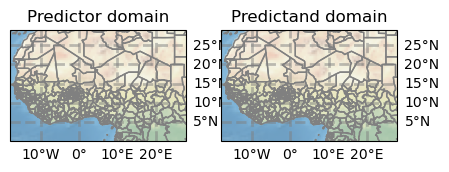

In [9]:
pycpt.plot_domains(download_args['predictor_extent'], download_args['predictand_extent'])

## Download Observations, Hindcasts, and Forecasts from IRI Data Library


Set **force_download** = False to avoid re-downloading files you have already downloaded. Note: if you have changed anything in download_args since the data were last downloaded, you must set force_download = True, otherwise you will use the old data instead of the new.

In [10]:
force_download = False

In [11]:
domain_dir

WindowsPath('D:/CCR_AOS/WASS2SHydroR-training/data/pycpt_HydroApr2025_SST_Nino_v3/-18W-28E_to_0S-29N')

In [13]:
Y, hindcast_data, forecast_data = pycpt.download_data(predictand_name, 
                                                      local_predictand_file, 
                                                      predictor_names, 
                                                      download_args, 
                                                      domain_dir, force_download)

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanCM4i/.FORECAST/.MONTHLY/.prec/S/first/(1%20Sep%202021)/RANGEEDGES/SOURCES/.Models/.NMME/.CanSIPS-IC3/.CanCM4i-IC3/.FORECAST/.MONTHLY/.prec/appendstream/S/%280000%201%20May%202025%29/VALUES/L/1.5/4.5/RANGEEDGES/%5BL%5D//keepgrids/average/%5BM%5D/average/Y/0/29/RANGEEDGES/X/-18/28/RANGEEDGES/122/mul/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv
Not found. Continuing without it.

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPSv2/.HINDCAST/.MONTHLY/.prec/SOURCES/.Models/.NMME/.CanSIPSv2/.FORECAST/.MONTHLY/.prec/appendstream/S/%280000%201%20May%202025%29/VALUES/L/1.5/4.5/RANGEEDGES/%5BL%5D//keepgrids/average/%5BM%5D/average/Y/0/29/RANGEEDGES/X/-18/28/RANGEEDGES/122/mul/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv
Not found. Continuing without it.

URL: https://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.CanSIPS-IC3/.FORECAST/.MONTHLY/.prec/S/%280000%201%20May%202025%29/VALUES/L/1.5/4.5

C:\Users\ARSENE\.local\share\mamba\envs\download_predictors\Lib\site-packages\pycpt\notebook.py:303: UserWarning: SEAS51.PRCP is deprecated. New configurations should use SEAS51c.PRCP instead. See https://iridl.ldeo.columbia.edu/SOURCES/.EU/.Copernicus/.CDS/.C3S/.ECMWF/.dataset_documentation.html .
  warnings.warn(
C:\Users\ARSENE\.local\share\mamba\envs\download_predictors\Lib\site-packages\pycpt\notebook.py:303: UserWarning: SEAS51b.PRCP is deprecated. New configurations should use SEAS51c.PRCP instead. See https://iridl.ldeo.columbia.edu/SOURCES/.EU/.Copernicus/.CDS/.C3S/.ECMWF/.dataset_documentation.html .
  warnings.warn(


Not found. Continuing without it.

URL: https://iridl.ldeo.columbia.edu/SOURCES/.EU/.Copernicus/.CDS/.C3S/.Meteo_France/.System7/.forecast/.prcp/S/%280000%201%20May%202025%29/VALUES/L/1.5/4.5/RANGEEDGES/%5BL%5D//keepgrids/average/Y/0/29/RANGEEDGES/X/-18/28/RANGEEDGES/%5BM%5D/average/c%3A/1000/(mm%20m-1)/%3Ac/mul/c%3A/86400/(s%20day-1)/%3Ac/mul/c%3A/122//units/(days)/def/%3Ac/mul/-999/setmissing_value/%5BX/Y%5D%5BL/S/add%5D/cptv10.tsv


KeyboardInterrupt: 

In [63]:
pycpt.summarize_available_years(predictor_names, predictand_name, download_args, Y, hindcast_data, forecast_data)

,UCSB.PRCP,CCSM4.SST,CFSv2.SST,SEAS51b.SST,METEOFRANCE8.SST,GEM5NEMO.SST,SPSv3p5.SST
1990,ok,ok,ok,ok,missing,ok,missing
1991,ok,ok,ok,ok,missing,ok,missing
1992,ok,ok,ok,ok,missing,ok,missing
1993,ok,ok,ok,ok,ok,ok,ok
1994,ok,ok,ok,ok,ok,ok,ok
1995,ok,ok,ok,ok,ok,ok,ok
1996,ok,ok,ok,ok,ok,ok,ok
1997,ok,ok,ok,ok,ok,ok,ok
1998,ok,ok,ok,ok,ok,ok,ok
1999,ok,ok,ok,ok,ok,ok,ok


,CCSM4.SST,CFSv2.SST,SEAS51b.SST,METEOFRANCE8.SST,GEM5NEMO.SST,SPSv3p5.SST
2024,ok,ok,ok,ok,ok,ok
